In [1]:
# 사이킷런에서 제공하는 당뇨병데이터셋 샘플 (x값한개 넣기위한 작업임, 의미없음)
from sklearn.datasets import load_diabetes
import numpy as np
diabetes = load_diabetes()

# 한개의 x값을 갖는 인공신경망을 만들기위하여 임의로 3번째의 변수를 x값으로 할당함, 3번째변수 의미없는 값임
x = diabetes.data[:, 2]   
y = diabetes.target

np.shape(x), np.shape(y)  # x,y 데이터갯수 같아야함.

((442,), (442,))

In [8]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [14]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

제공된 데이터는 이미 벡터화, 정규화 완료된 자료로, 머신러닝의 경우 모델만 결정하면 결과 받아볼 수 있음!  
대신 모델의 설명력 작업할 필요 있다

In [13]:
len(diabetes.data)

442

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(np.reshape(x, (-1, 1)), np.reshape(y, (-1, 1)))
model.predict(np.reshape(x, (-1, 1)))

array([[210.71003806],
       [103.26219543],
       [194.33703347],
       [141.12476855],
       [117.58857445],
       [113.4953233 ],
       [107.35544658],
       [150.33458363],
       [210.71003806],
       [189.22046954],
       [ 72.56281182],
       [168.7542138 ],
       [124.75176395],
       [150.33458363],
       [127.82170232],
       [134.98489182],
       [192.2904079 ],
       [163.63764986],
       [142.14808133],
       [134.98489182],
       [ 98.14563149],
       [130.89164068],
       [148.28795806],
       [209.68672528],
       [186.15053118],
       [140.10145576],
       [ 78.70268854],
       [208.66341249],
       [131.91495346],
       [146.24133248],
       [194.33703347],
       [ 89.9591292 ],
       [271.0854925 ],
       [104.28550821],
       [ 92.00575477],
       [122.70513838],
       [173.87077773],
       [162.61433707],
       [219.91985315],
       [165.68427544],
       [144.19470691],
       [ 87.91250362],
       [142.14808133],
       [129

In [25]:
xx = [[1,2,3],
      [2,2,3],
      [3,2,3],
      [4,3,2]]

w = [[10, 11, 12, 13, 14],
     [20, 21, 22, 23, 24],
     [30, 31, 32, 33, 34]]

b = [100, 0, 0, 0, 100]

xx = np.array(xx); w = np.array(w)
for i in range(4):
      print(np.shape(xx), np.shape(w), np.dot(xx, w[:,i])+b[i])

(4, 3) (3, 5) [240 250 260 260]
(4, 3) (3, 5) [146 157 168 169]
(4, 3) (3, 5) [152 164 176 178]
(4, 3) (3, 5) [158 171 184 187]


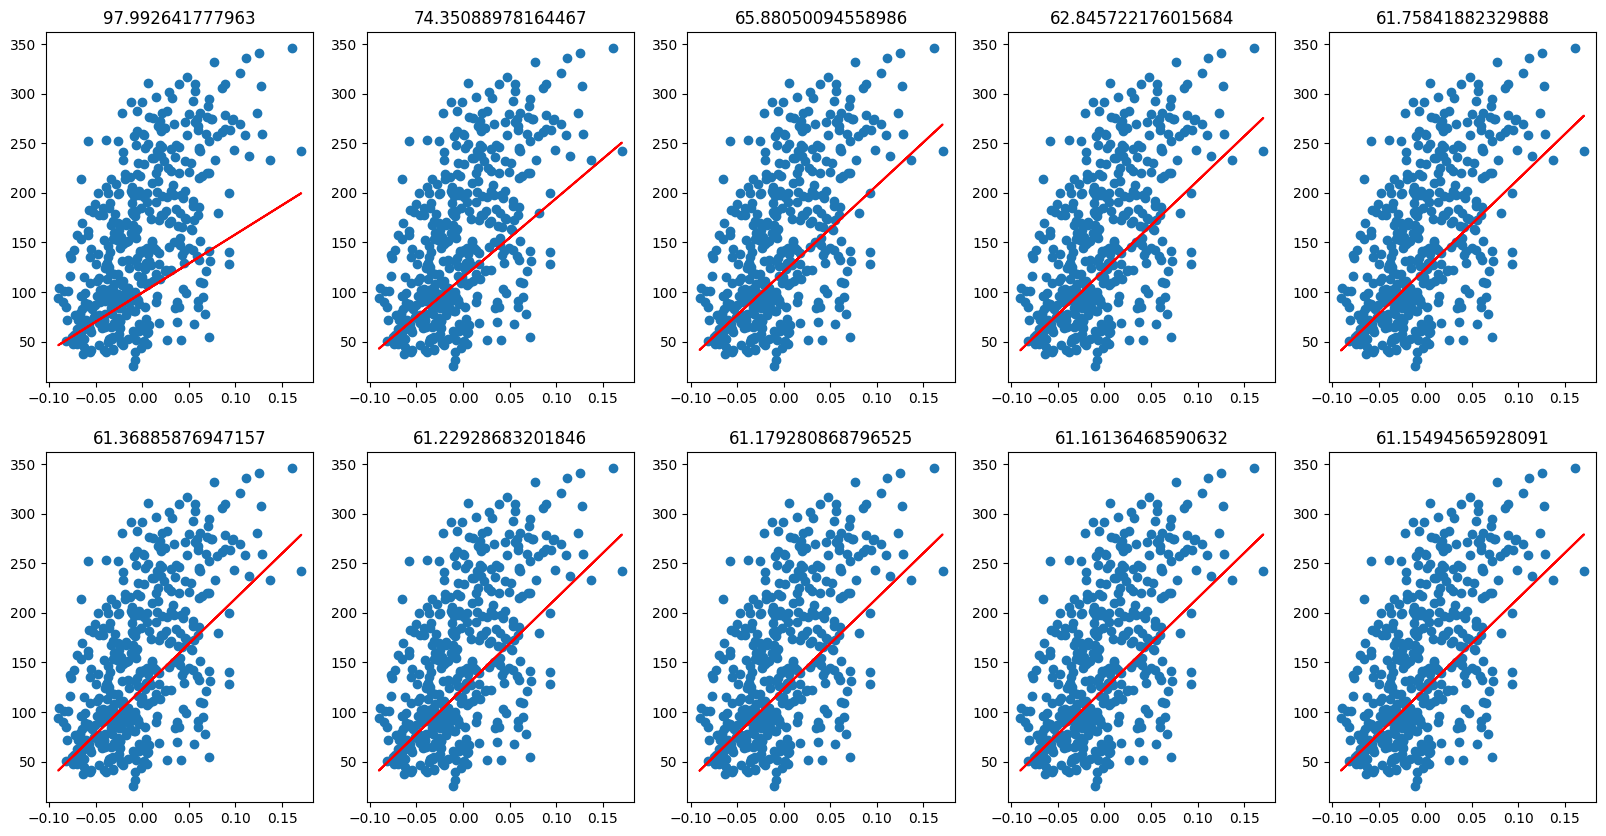

In [27]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
        self.lr=1
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=10):
        plt.figure(figsize=(20,10))  # 그래프 사이즈
        
        for i in range(epochs):           # 에포크만큼 반복합니다
            
            for x_i, y_i in zip(x, y):    # 배치 1
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad *self.lr        # 가중치 업데이트
                self.b -= b_grad *self.lr         # 절편 업데이트
                
            plt.subplot(int(epochs/5),5,i+1)
            plt.scatter(x,y)
            plt.plot(x,x*self.w+self.b, 'r')
            plt.title(err)
            #plt.show()
neuron = Neuron()
neuron.fit(x, y)            

사용자가 x값을 입력하면 각 레이어층에서 사용자가 지정한 활성화함수로 계산해서 output 출력  
그 output을 다음 레이어에 input되어 x값으로 지정됨  
이 과정을 마지막 레이어까지 반복 반복!  

작업이 끝나면 마지막 레이어에서 출력된 값과 실제 값을 비교하여 오차를 계산하고 경사하강(optimizer에 따라) 후 오차역전파하여 lr값에 비례해 가중치와 절편 업데이트

### 오차를 계산하는 단위
    배치 단위 (한 개의 에포크 안에서 나뉘는 자료의 개수)
    에포크 단위

예를 들어 한 개의 훈련 데이터가 300개일 때, (배치 5, 에포크 20)으로 훈련 진행한다면
    1에포크에 (300/5)번의 오차 계산 => 60 * 20 = 1200번의 오차 계산 진행!